<a id ='Table of contents'></a>
<p id="part0"></p>
<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #000000">THYROID DISEASE PREDICTION</p>
<img src="https://storage.googleapis.com/kaggle-datasets-images/4979752/8375315/52464f8f49f436d904c33bdd0ba2ac1c/dataset-cover.jpg?t=2024-05-10-12-16-22" width="100%" align="center"  hspace="5%" vspace="5%"/>

# Table Content 

* [Library call](#part-1)
* [EDA](#part-2)
     * [Age Analysis](#part-2-1)
     * [Gender Analysis](#part-2-2)
     * [Focality Analysis](#part-2-3)
     * [Stage Analysis](#part-2-4)
     * [Hx-Radiothreapy Analysis](#part-2-5)
     * [Adenopathy Analysis](#part-2-6)
     * [Pathology Analysis](#part-2-7)
     * [Physical Examination Analysis](#part-2-8)
     * [Tumor Analysis](#part-2-9)
     * [Nodal Analysis](#part-2-10)
     * [Metastasis Analysis](#part-2-11)
    * [Data prepossessing](#part-3)
 * [split](#part-3-1)
 * [prepossesse categorical columns](#part-3-2)
 * [prepocssesse numeric columns](#part-3-3)
* [Modeling](#part-4)
     * [cross-validation](#part-4-1) 
     * [Analysis a model performance](#part-4-2)
     * [choose our best model for this dataset](#part-4-3)
     * [Optimize our Final Model](#part-4-4)
     * [Final model with parameter and performance](#part-4-5)
* [Create a single output](#part-5)
     * [create a single input and predict stepwise](#part-5-1)
     * [create single predict function](#part-5-2)
* [Save and Load the model](#part-6)
     * [save](#part-6-1) 
     * [load](#part-6-2) 
     * [performance](#part-6-3)
 
### About Dataset
This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

### Source
The data was procured from thyroid disease datasets provided by the UCI Machine Learning Repository.

### Content
The size for the file featured within this Kaggle dataset is shown below — along with a list of attributes, and their description summaries:

**Age**: The age of the patient at the time of diagnosis or treatment.

**Gender**: The gender of the patient (male or female).

**Smoking**: Whether the patient is a smoker or not.

**Hx Smoking**: Smoking history of the patient (e.g., whether they have ever smoked).

**Hx Radiotherapy**: History of radiotherapy treatment for any condition.

**Thyroid Function**: The status of thyroid function, possibly indicating if there are any abnormalities.

**Physical Examination**: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.

**Adenopathy**: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.

**Pathology**: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.

**Focality**: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).

**Risk**: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.

**T**: Tumor classification based on its size and extent of invasion into nearby structures.

**N**: Nodal classification indicating the involvement of lymph nodes.

**M**: Metastasis classification indicating the presence or absence of distant metastases.

**Stage**: The overall stage of the cancer, typically determined by combining T, N, and M classifications.

**Response**: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.

**Recurred**: Indicates whether the cancer has recurred after initial treatment.

<a id ='part-1'></a>
# Library call

In [1]:
import pandas as pd 
import numpy as np 
import  seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot  as  plt 
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import joblib

In [2]:
df = pd.read_csv('/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv',low_memory=True)

In [3]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
# rename 
df.rename(columns={'T':'Tumor','N':'Nodal','M':'Metastasis'},inplace=True)

In [6]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'Tumor', 'Nodal', 'Metastasis', 'Stage', 'Response',
       'Recurred'],
      dtype='object')

In [7]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Tumor,Nodal,Metastasis,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [8]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
Tumor                   0
Nodal                   0
Metastasis              0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [9]:
df.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
Tumor                    7
Nodal                    3
Metastasis               2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

<a id='part-2'></a>
# EDA 


<a id='part-2-1'></a>
## Age Analysis

In [10]:
fig = px.histogram(data_frame=df,
                   x ='Age',
                   nbins=20,marginal='box',
                    color_discrete_sequence=px.colors.sequential.GnBu_r,
                   text_auto=True,title='The Distribution of Age')
fig.update_layout()
fig.show()

In [11]:
fig = px.histogram(data_frame=df,
                   x ='Age',
                   nbins=20,marginal='box',
                   color='Recurred',
                   color_discrete_sequence=px.colors.sequential.Agsunset_r,
                   text_auto=True,title='The Distribution of Recurred based on Age')
fig.update_layout()
fig.show()

<a id='part-2-2'></a>
## Gender Analysis

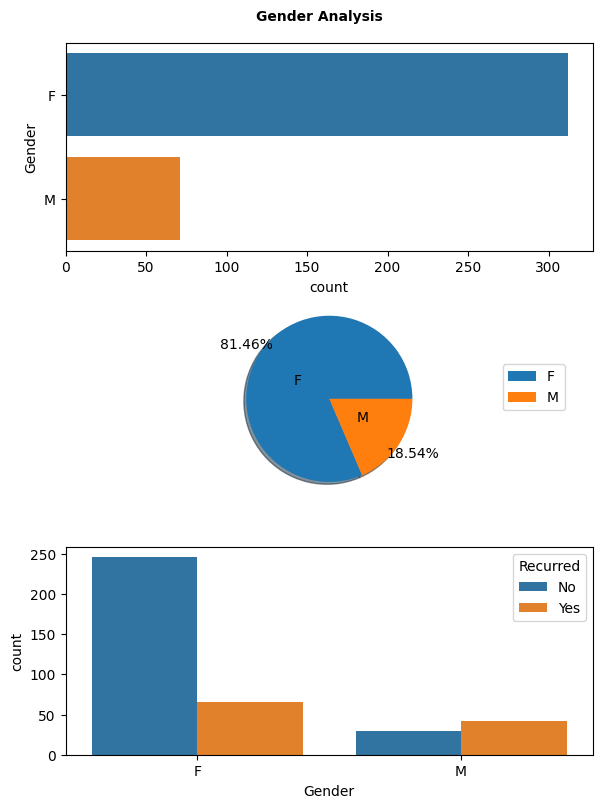

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(6, 8))
fig.suptitle('Gender Analysis', fontsize=10, fontweight='bold')
plt.tight_layout()

count = df['Gender'].value_counts()

labels = df['Gender'].value_counts().index.tolist()

#Top ax
sns.countplot(y="Gender",data=df, ax=ax[0])
#middle ax
ax[1].pie(count, autopct='%.2f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[1].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.countplot(x='Gender', hue='Recurred', data=df, ax=ax[2])
plt.show()

<a id='part-2-3'></a>
## Focality Analysis

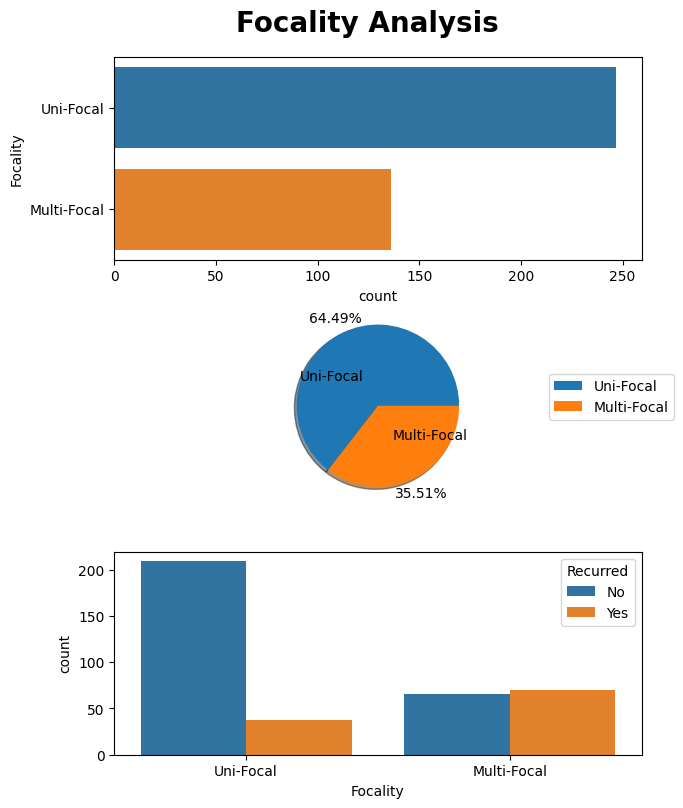

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(6, 8))
fig.suptitle('Focality Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

count = df['Focality'].value_counts()

labels = df['Focality'].value_counts().index.tolist()

#Top ax
sns.countplot(y="Focality",data=df, ax=ax[0])
#middle ax
ax[1].pie(count, autopct='%.2f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[1].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.countplot(x='Focality', hue='Recurred', data=df, ax=ax[2])
plt.show()

<a id='part-2-4'></a>
## Stage Analysis

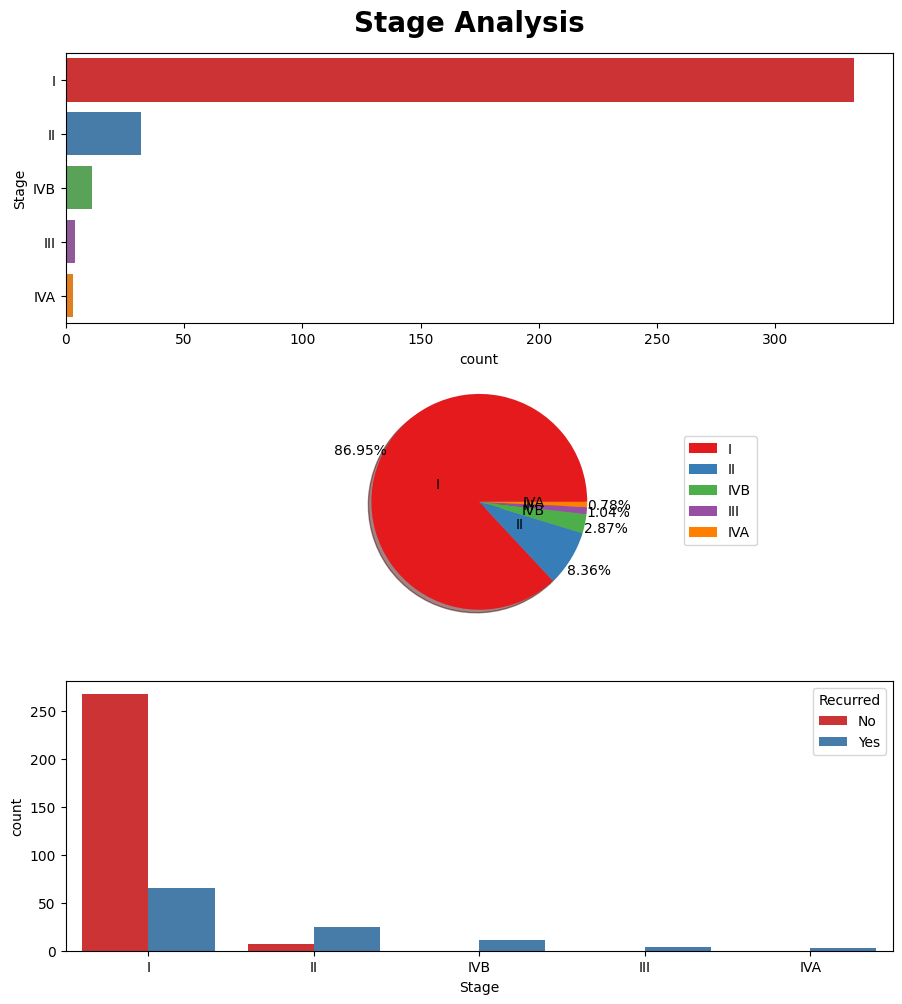

In [14]:
sns.set_palette('Set1')
fig, ax = plt.subplots(3, 1, figsize=(9, 10))
fig.suptitle('Stage Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

count = df['Stage'].value_counts()

labels = df['Stage'].value_counts().index.tolist()

#Top ax
sns.countplot(y="Stage",data=df, ax=ax[0])
#middle ax
ax[1].pie(count, autopct='%.2f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[1].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.countplot(x='Stage', hue='Recurred', data=df, ax=ax[2])
plt.show()

<a id='part-2-5'></a>
## Hx-Radiothreapy Analysis

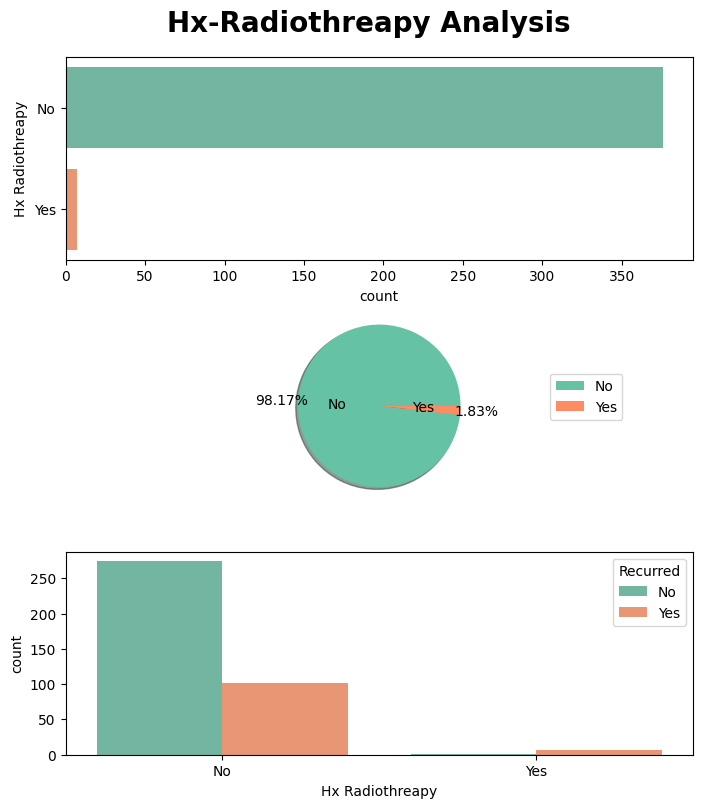

In [15]:
sns.set_palette('Set2')
fig, ax = plt.subplots(3, 1, figsize=(7, 8))
fig.suptitle('Hx-Radiothreapy Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

count = df['Hx Radiothreapy'].value_counts()

labels = df['Hx Radiothreapy'].value_counts().index.tolist()

#Top ax
sns.countplot(y="Hx Radiothreapy",data=df, ax=ax[0])
#middle ax
ax[1].pie(count, autopct='%.2f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[1].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.countplot(x='Hx Radiothreapy', hue='Recurred', data=df, ax=ax[2])
plt.show()

<a id='part-2-6'></a>
## Adenopathy Analysis

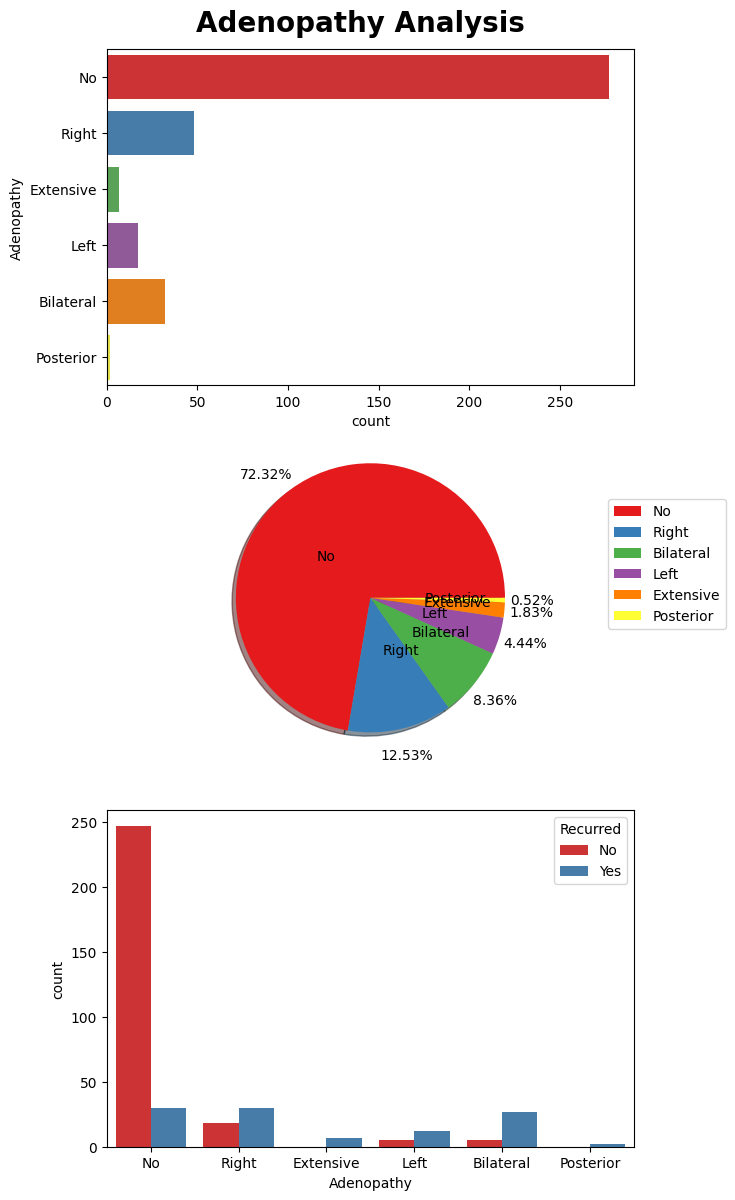

In [16]:
sns.set_palette('Set1')
fig, ax = plt.subplots(3, 1, figsize=(6, 12))
fig.suptitle('Adenopathy Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

count = df.Adenopathy.value_counts()

labels = df.Adenopathy.value_counts().index.tolist()

#Top ax
sns.countplot(y="Adenopathy",data=df, ax=ax[0])
#middle ax
ax[1].pie(count, autopct='%.2f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[1].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.countplot(x='Adenopathy', hue='Recurred', data=df, ax=ax[2])
plt.show()

<a id='part-2-7'></a>
## Pathology Analysis

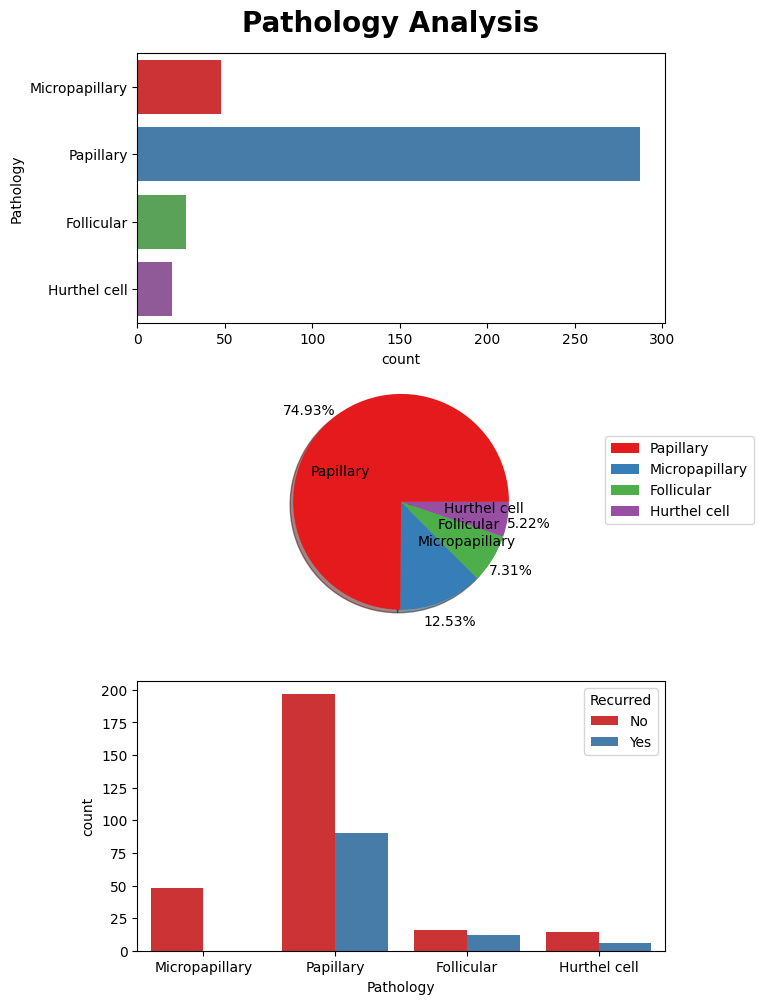

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(6, 10))
fig.suptitle('Pathology Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

count = df.Pathology.value_counts()

labels = df.Pathology.value_counts().index.tolist()

#Top ax
sns.countplot(y="Pathology",data=df, ax=ax[0])
#middle ax
ax[1].pie(count, autopct='%.2f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[1].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.countplot(x='Pathology', hue='Recurred', data=df, ax=ax[2])
plt.show()

<a id='part-2-8'></a>
## Physical Examination Analysis

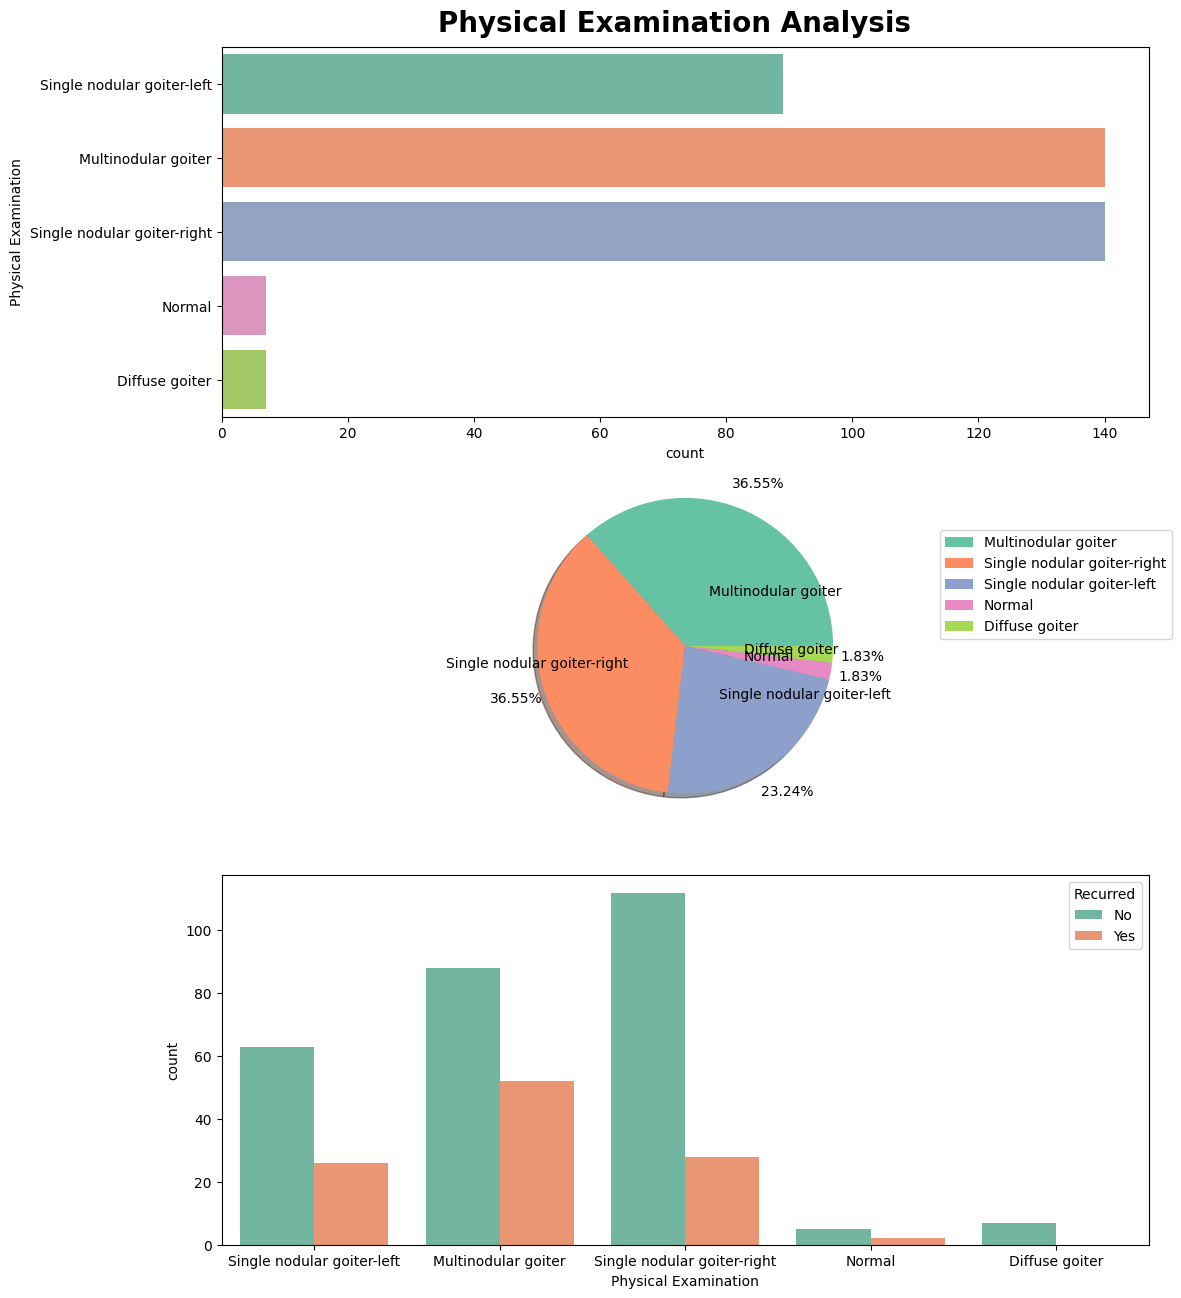

In [18]:
sns.set_palette('Set2')
fig, ax = plt.subplots(3, 1, figsize=(10, 13))
fig.suptitle('Physical Examination Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

count = df['Physical Examination'].value_counts()

labels = df['Physical Examination'].value_counts().index.tolist()

#Top ax
sns.countplot(y="Physical Examination",data=df, ax=ax[0])
#Middle ax
ax[1].pie(count, autopct='%.2f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[1].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.countplot(x='Physical Examination', hue='Recurred', data=df, ax=ax[2])
plt.show()

<a id='part-2-9'></a>
## Tumor Analysis

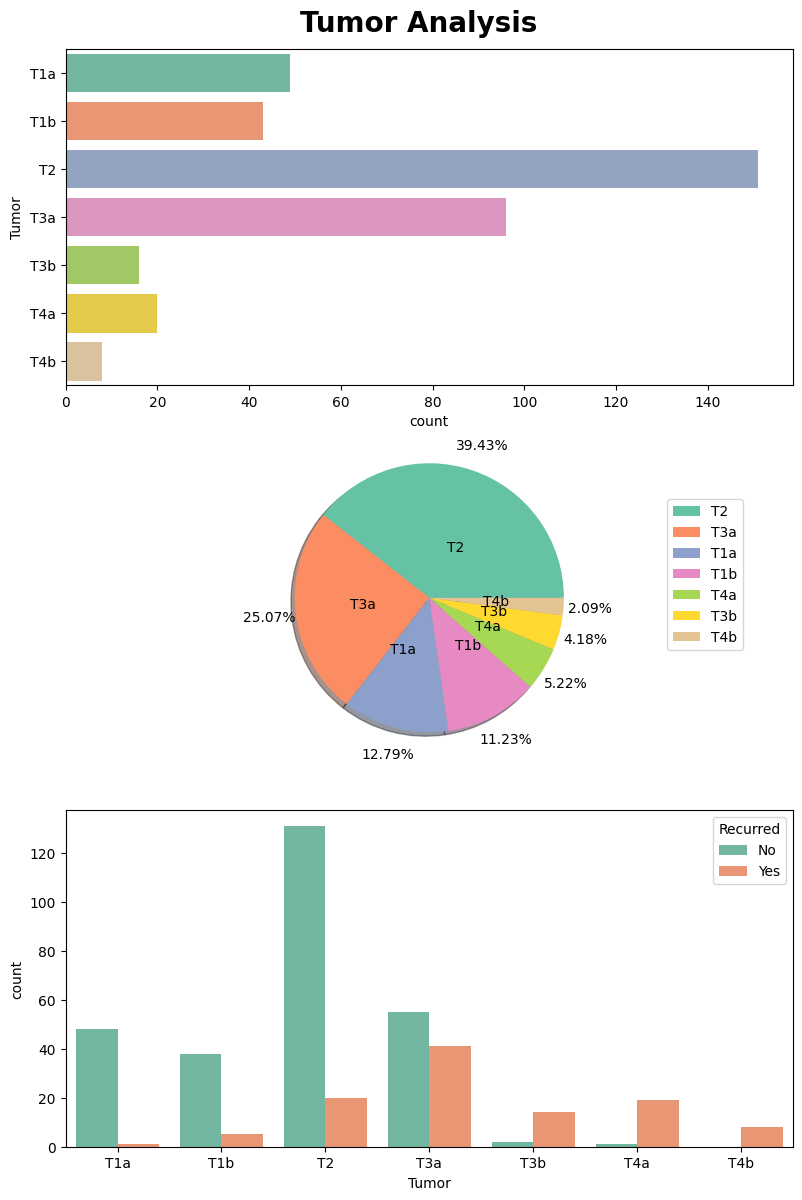

In [19]:
sns.set_palette('Set2')
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
fig.suptitle('Tumor Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

count = df.Tumor.value_counts()

labels = df.Tumor.value_counts().index.tolist()

#Top ax
sns.countplot(y="Tumor",data=df, ax=ax[0])
#middle ax
ax[1].pie(count, autopct='%.2f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[1].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.countplot(x='Tumor', hue='Recurred', data=df, ax=ax[2])
plt.show()

<a id='part-2-10'></a>
## Nodal Analysis

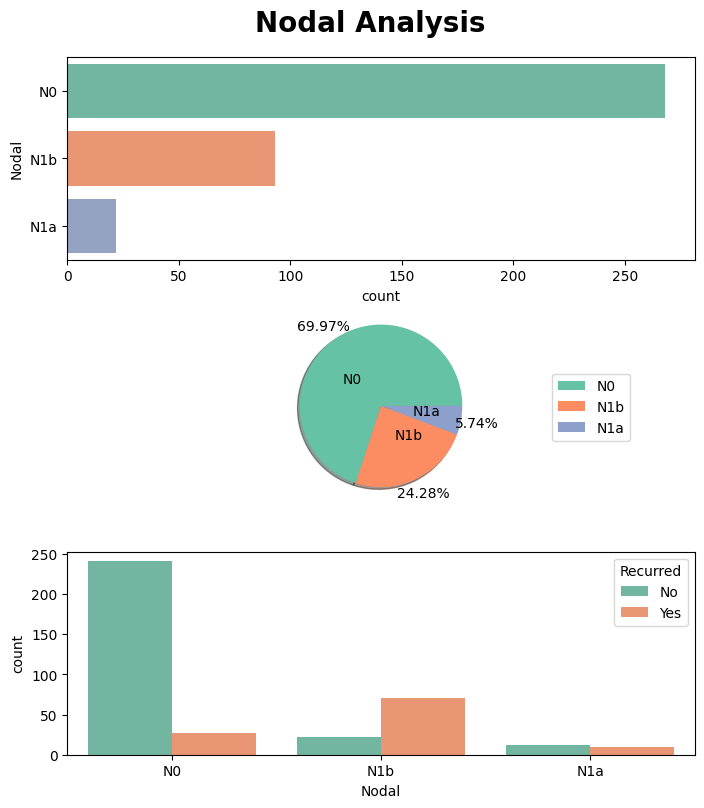

In [20]:
sns.set_palette('Set2')
fig, ax = plt.subplots(3, 1, figsize=(7, 8))
fig.suptitle('Nodal Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

count = df.Nodal.value_counts()

labels = df.Nodal.value_counts().index.tolist()
#Top ax
sns.countplot(y="Nodal",data=df, ax=ax[0])
#Middle ax
ax[1].pie(count, autopct='%.2f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[1].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.countplot(x='Nodal', hue='Recurred', data=df, ax=ax[2])
plt.show()

<a id='part-2-11'></a>
## Metastasis Analysis

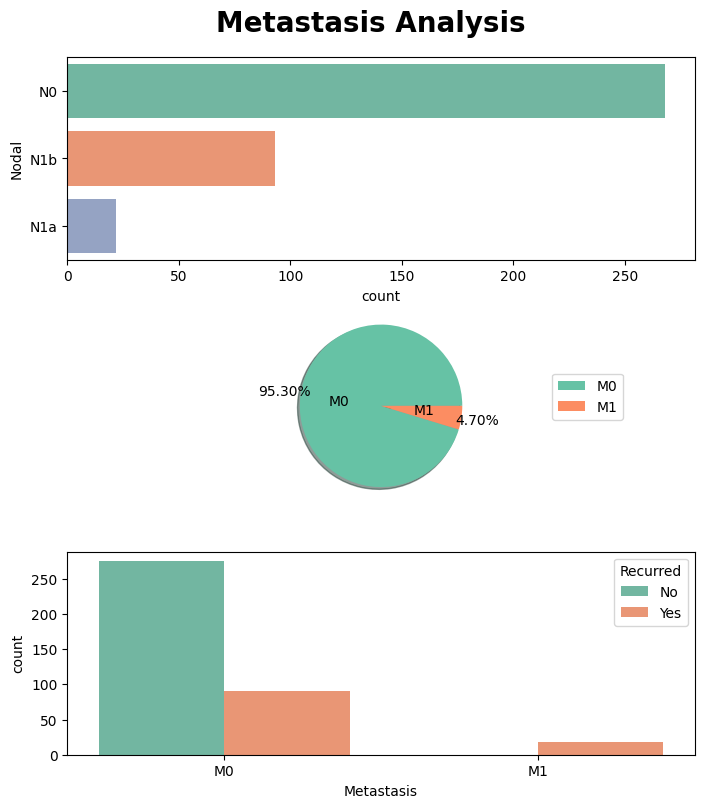

In [21]:
sns.set_palette('Set2')
fig, ax = plt.subplots(3, 1, figsize=(7, 8))
fig.suptitle('Metastasis Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

count = df.Metastasis.value_counts()



labels = df.Metastasis.value_counts().index.tolist()
#Top ax
sns.countplot(y="Nodal",data=df, ax=ax[0])
#Middle ax
ax[1].pie(count, autopct='%.2f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[1].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.countplot(x='Metastasis', hue='Recurred', data=df, ax=ax[2])
plt.show()

<a id='part-3'></a>
# Data prepossessing

<a id='part-3-1'></a>

## split

In [22]:
inputs_df = df.drop('Recurred',axis=1)
targets_df= df[['Recurred']]


<a id='part-3-2'></a>
## prepossesse categorical columns

In [23]:
categorical_cols = inputs_df.select_dtypes(include='object').columns.tolist()
categorical_cols

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'Tumor',
 'Nodal',
 'Metastasis',
 'Stage',
 'Response']

In [24]:
# prepocssesse the categorical 
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(inputs_df[categorical_cols])
encoder_cols = encoder.get_feature_names_out(categorical_cols)
inputs_df[encoder_cols] =encoder.transform(inputs_df[categorical_cols])

In [25]:
final_df = pd.concat([inputs_df['Age'],inputs_df[encoder_cols]],axis=1)

<a id='part-3-3'></a>
## prepocssesse numeric columns

In [26]:
scaler = MinMaxScaler()
final_df[['Age']] = scaler.fit_transform(final_df[['Age']])

In [27]:
 X = final_df # independent 
 y= targets_df # dependent

In [28]:
X

,Age,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,...,Metastasis_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,0.179104,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.283582,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.223881,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.701493,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.701493,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.850746,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
379,0.985075,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
380,0.850746,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
381,0.686567,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [29]:
y

,Recurred
0,No
1,No
2,No
3,No
4,No
...,...
378,Yes
379,Yes
380,Yes
381,Yes


<a id='part-4'></a>
# Modeling

<a id='part-4-1'></a>
## cross-validation

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.20,random_state=42)

<a id='part-4-2'></a>
## Analysis a model performance 

In [31]:
logist = LogisticRegression()
logist.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [32]:
logist.predict(xtest)

array(['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'Yes'], dtype=object)

In [33]:
print(classification_report(ytest,logist.predict(xtest)))


              precision    recall  f1-score   support

          No       0.98      0.98      0.98        58
         Yes       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



In [34]:
cm = confusion_matrix(ytest,logist.predict(xtest))
cm

array([[57,  1],
       [ 1, 18]])

In [35]:
accuracy_score(ytest,logist.predict(xtest))

0.974025974025974

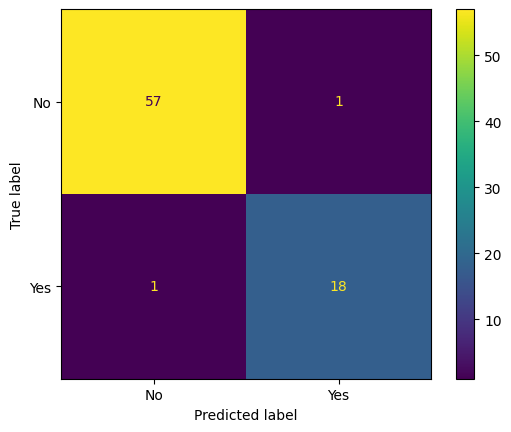

In [36]:
fig = ConfusionMatrixDisplay(cm,display_labels=logist.classes_)
fig.plot()

<a id='part-4-3'></a>
## choose our best model for this dataset

In [37]:
logist = LogisticRegression()
sgd =SGDClassifier()
svc = SVC()
random = RandomForestClassifier()
grad = GradientBoostingClassifier()
bag = BaggingClassifier()

In [38]:
model_li = [logist,sgd,svc,random,grad,bag]
model_li

[LogisticRegression(),
 SGDClassifier(),
 SVC(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 BaggingClassifier()]

In [39]:
accuracy = []
for model in model_li:
    model.fit(xtrain,ytrain)
    accuracy.append(accuracy_score(ytest,model.predict(xtest)))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/tmp/ipykernel_36/1828380418.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y w

In [40]:
accuracy

[0.974025974025974,
 0.935064935064935,
 0.961038961038961,
 0.974025974025974,
 0.974025974025974,
 0.974025974025974]

<Axes: xlabel='Accuracy', ylabel='Model'>

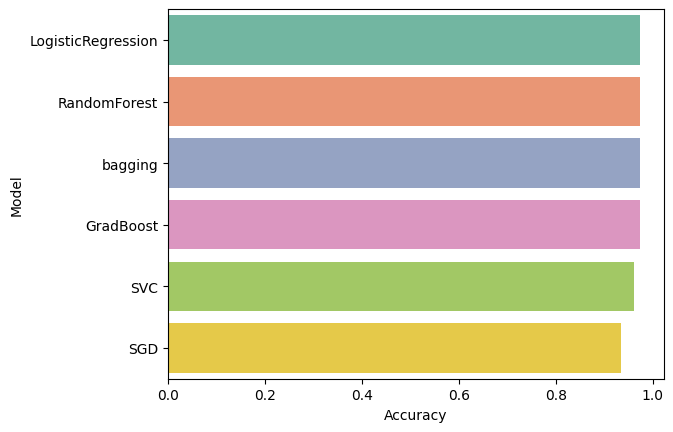

In [41]:
model_result = {
    'Model':["LogisticRegression","SGD","SVC",'RandomForest','GradBoost','bagging'],
    'Accuracy':accuracy
}
result_df = pd.DataFrame(model_result).sort_values(by='Accuracy',ascending=False)
sns.barplot(data=result_df,y='Model',x='Accuracy')

<a id='part-4-4'></a>
## Optimize our Final Model 

In [42]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42,n_jobs=-1,**params)
    model.fit(xtrain,ytrain)
    accuracy = accuracy_score(ytest,model.predict(xtest))
    print("The accuracy is  : ",accuracy)

In [43]:
test_params(min_samples_split=15)

/tmp/ipykernel_36/902571088.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



The accuracy is  :  0.987012987012987


In [44]:
test_params(max_depth=15)

/tmp/ipykernel_36/902571088.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



The accuracy is  :  0.974025974025974


In [45]:
test_params(min_samples_split=5,max_depth=16)

/tmp/ipykernel_36/902571088.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



The accuracy is  :  0.987012987012987


In [46]:
test_params(min_weight_fraction_leaf=0.1)

/tmp/ipykernel_36/902571088.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



The accuracy is  :  0.922077922077922


In [47]:
test_params(min_samples_split=5,max_depth=10)

/tmp/ipykernel_36/902571088.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



The accuracy is  :  0.987012987012987


In [48]:
test_params(min_impurity_decrease=0.1)

/tmp/ipykernel_36/902571088.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



The accuracy is  :  0.922077922077922


<a id='part-4-5'></a>
## Final model with parameter and performance


In [49]:
# final model 
random = RandomForestClassifier(random_state=42,min_samples_split=5,max_depth=16,n_jobs=-1)
random.fit(xtrain,ytrain)
accuracy = accuracy_score(ytest,random.predict(xtest))
print("The accuracy is  : ",accuracy)

/tmp/ipykernel_36/1937098736.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



The accuracy is  :  0.987012987012987


In [50]:
print(classification_report(ytest,random.predict(xtest)))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99        58
         Yes       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



In [51]:
cm = confusion_matrix(ytest,random.predict(xtest))
cm

array([[58,  0],
       [ 1, 18]])

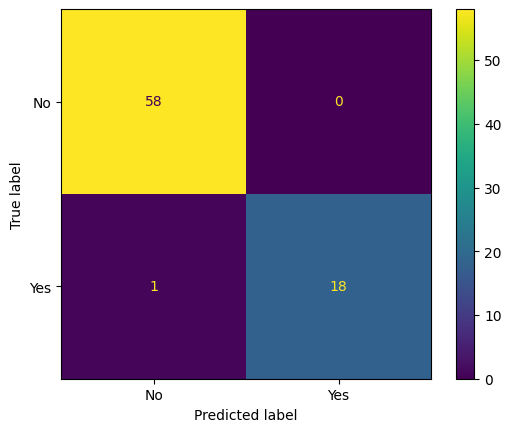

In [52]:
fig = ConfusionMatrixDisplay(cm,display_labels=logist.classes_)
fig.plot()

<a id='part-5'></a>
# Create a single output

<a id='part-5-1'></a>
## create a single input and predict stepwise

In [53]:
new_input ={
    'Age':30, 
    'Gender':'F',
    'Smoking':'No', 
    'Hx Smoking':'No', 
    'Hx Radiothreapy':'No',
    'Thyroid Function':'Euthyroid', 
    'Physical Examination':'Multinodular goiter', 
    'Adenopathy':'No', 
    'Pathology':'Micropapillary',
    'Focality':'Uni-Focal',
    'Risk':'Low', 
    'Tumor':'T1a',
    'Nodal':'N0', 
    'Metastasis':'M0', 
    'Stage':'I', 
    'Response':'Excellent'
}

In [54]:
new_df = pd.DataFrame([new_input])
new_df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Tumor,Nodal,Metastasis,Stage,Response
0,30,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent


In [55]:
new_df.shape

(1, 16)

In [56]:
new_df[encoder_cols] =encoder.transform(new_df[categorical_cols])
new_df[['Age']] = scaler.fit_transform(new_df[['Age']])
new_df = pd.concat([new_df['Age'],new_df[encoder_cols]],axis=1)

In [57]:
new_df

,Age,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,...,Metastasis_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
random.predict(new_df)

array(['No'], dtype=object)

<a id='part-5-2'></a>
## create single predict function

In [59]:

def single_prediction(new_input):
    new_df = pd.DataFrame([new_input])
    new_df[encoder_cols] =encoder.transform(new_df[categorical_cols])
    new_df[['Age']] = scaler.fit_transform(new_df[['Age']])
    new_df = pd.concat([new_df['Age'],new_df[encoder_cols]],axis=1)
    pred = random.predict(new_df)[0]
    proba = random.predict_proba(new_df)[0][0]
    print('Single value prediction is : ',pred)
    print('Single value predic probability is : ',proba)


In [60]:
single_prediction(new_input)

Single value prediction is :  No
Single value predic probability is :  0.97875


<a id='part-6'></a>
# Save and Load  the model

<a id='part-6-1'></a>
## save

In [61]:
model_part = {
    'model':random
}

In [62]:
joblib.dump(model_part,'Thyroid model.joblib')

['Thyroid model.joblib']

<a id='part-6-2'></a>
## load

In [63]:
# load the model 
random = joblib.load('Thyroid model.joblib')

<a id='part-6-3'></a>
## performance

In [64]:
pred = random['model'].predict(xtest)
pred

array(['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No'], dtype=object)

In [65]:
proba = random['model'].predict_proba(xtest)
proba

array([[1.        , 0.        ],
       [0.96191667, 0.03808333],
       [0.04402381, 0.95597619],
       [0.28420238, 0.71579762],
       [1.        , 0.        ],
       [0.08691667, 0.91308333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.47      , 0.53      ],
       [0.73602381, 0.26397619],
       [0.99866667, 0.00133333],
       [0.95184524, 0.04815476],
       [0.95838095, 0.04161905],
       [0.99866667, 0.00133333],
       [1.        , 0.        ],
       [0.99866667, 0.00133333],
       [0.03045455, 0.96954545],
       [0.0425    , 0.9575    ],
       [0.98114286, 0.01885714],
       [0.97875   , 0.02125   ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.97797619, 0.02202381],
       [0.99166667, 0.00833333],
       [0.887     , 0.113     ],
       [0.99866667, 0.00133333],
       [0.84383333, 0.15616667],
       [0.99      , 0.01      ],
       [0.35816667, 0.64183333],
       [0.